In [188]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose

In [189]:
crawldata_colnames=['date', 'crawled_pages'] 
linkdata_colnames= ['links','date'] 
cd = pd.read_csv("crawl.csv",sep='\s',parse_dates=['date'], index_col='date', usecols=[*range(0,2)], names=crawldata_colnames, skiprows=1,header=None)
gad = pd.read_csv("google_analytics_data.csv", parse_dates=['ga:date'], index_col='ga:date')
ld = pd.read_csv("links.csv", parse_dates=['date'], index_col='date',names=linkdata_colnames,skiprows=1,header=None)

/home/aa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [190]:
pa= gad.loc[gad['ga:sourceMedium'] == 'google / organic'].groupby(['ga:date']).count()['ga:pagePath']

In [191]:
pa = pa.reset_index()
pa.columns = ['date','active_pages']
pa.set_index('date',inplace=True)

In [192]:
ld = ld.groupby(['date']).count()['links']

In [193]:
df = pd.concat([cd, pa, ld], axis=1)

In [194]:
df = df.fillna(0)

In [195]:
dfw =  df.resample('W').sum()
dfw.corr()

,crawled_pages,active_pages,links
crawled_pages,1.00000,0.119270,0.472280
active_pages,0.11927,1.000000,0.162117
links,0.47228,0.162117,1.000000


In [196]:
df2w =  df.resample('MS', loffset=pd.Timedelta(14, 'd')).sum()
df2w.corr()

,crawled_pages,active_pages,links
crawled_pages,1.000000,0.365306,0.569630
active_pages,0.365306,1.000000,0.253734
links,0.569630,0.253734,1.000000


In [197]:
df2w =  df.resample('MS', loffset=pd.Timedelta(14, 'd')).sum()
df2w.corr()

,crawled_pages,active_pages,links
crawled_pages,1.000000,0.365306,0.569630
active_pages,0.365306,1.000000,0.253734
links,0.569630,0.253734,1.000000


In [173]:
dfm =  df.resample('M').sum()
dfm.corr()

,crawled_pages,active_pages,links
crawled_pages,1.000000,0.365306,0.569630
active_pages,0.365306,1.000000,0.253734
links,0.569630,0.253734,1.000000


In [174]:
scaler = StandardScaler()
dfm[['crawled_pages', 'active_pages','links']] = scaler.fit_transform(dfm[['crawled_pages', 'active_pages','links']])

<Figure size 432x288 with 0 Axes>

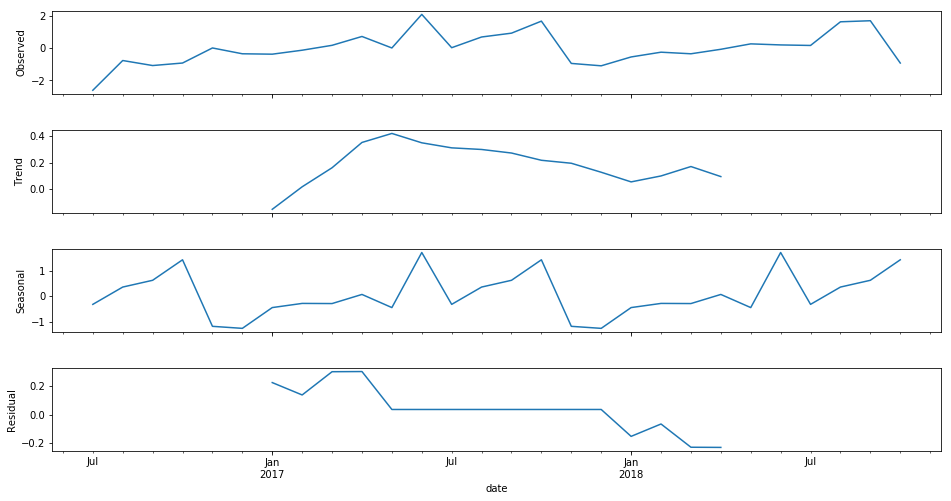

In [159]:
decomposition = seasonal_decompose(dfm['crawled_pages'], freq = 12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

<Figure size 432x288 with 0 Axes>

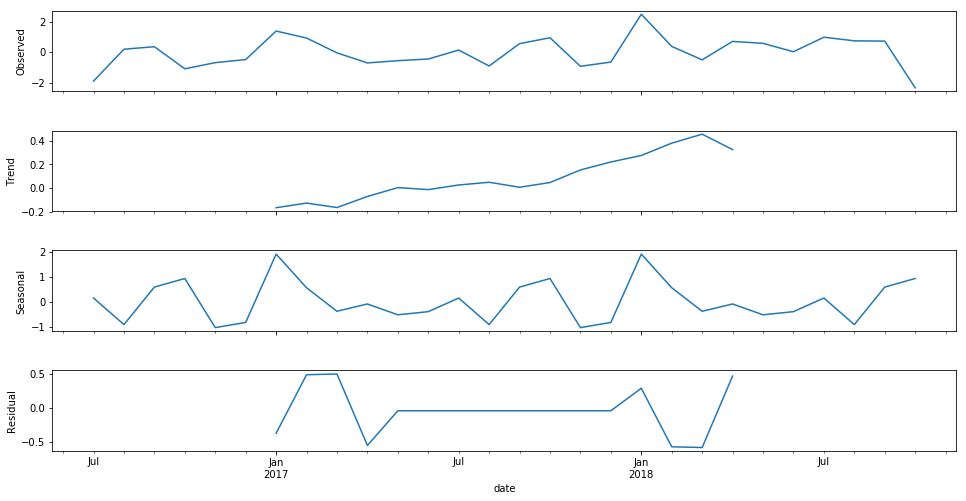

In [160]:
decomposition = seasonal_decompose(dfm['active_pages'], freq = 12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

<Figure size 432x288 with 0 Axes>

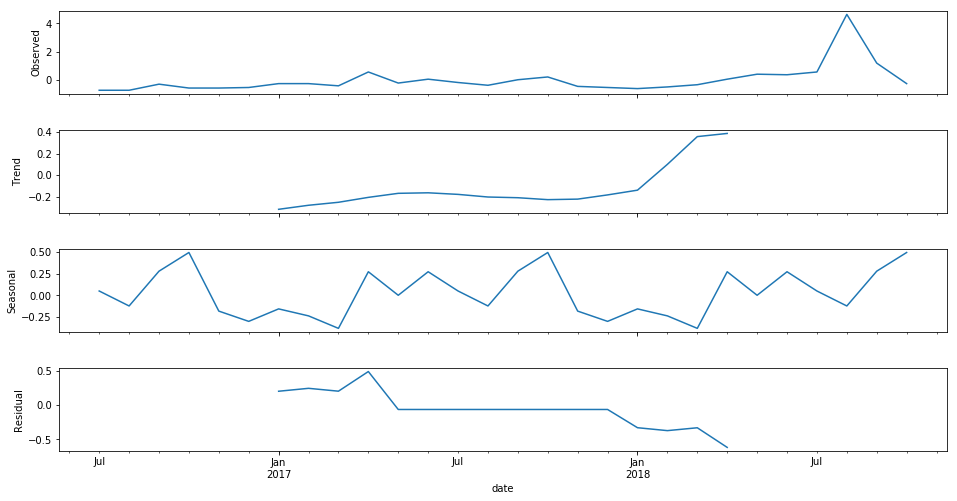

In [175]:
decomposition = seasonal_decompose(dfm['links'], freq = 12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)